# Dairy Data Trends in the United States and beyond

In [41]:
%matplotlib inline

In [66]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
import pylab as pl
import requests
import json
import numpy as np
import matplotlib.transforms as mtrans
import mpl_toolkits.axes_grid1.inset_locator as inset
import seaborn
from matplotlib import collections
import matplotlib.patches as mpatches
import textwrap


In [67]:
# Import annual data as DataFrame
annual_milk_production = pd.read_csv("Resources/us_annual_milk_production_16-18.csv")
annual_milk_production.head()

,Milk Production,2016,2017,2018
0,Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
1,Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
2,Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
3,Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [68]:
reset_milk_production = annual_milk_production.set_index('Milk Production')
reset_milk_production

,2016,2017,2018
Milk Production,,,
Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [69]:
transpose_milk_production = reset_milk_production.transpose()
transpose_milk_production

Milk Production,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.)
2016,"199,434","8,653","23,049","212,405"
2017,"202,455","8,725","23,204","215,466"
2018,"204,825","8,734","23,451","217,476"


In [70]:
annual_milk_price = pd.read_csv("Resources/us_annual_milk_price_16-18.csv")
annual_milk_price.head()

,Milk Price,2016,2017,2018
0,All milk (Dol./cwt),16.30,17.60,16.20
1,Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
2,Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [71]:
reset_milk_price = annual_milk_price.set_index('Milk Price')
reset_milk_price

,2016,2017,2018
Milk Price,,,
All milk (Dol./cwt),16.30,17.60,16.20
Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [72]:
transpose_milk_price = reset_milk_price.transpose()
transpose_milk_price


Milk Price,All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
2016,16.3,14.87,13.77
2017,17.6,16.17,15.16
2018,16.2,14.61,14.23


In [73]:
merge_production_price = transpose_milk_production.merge(transpose_milk_price, on=transpose_milk_production.index)
merge_production_price

,key_0,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
0,2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
1,2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2,2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [74]:
reset_merge = merge_production_price.set_index('key_0')
reset_merge

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
key_0,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [75]:
renamed_milk_price_production = reset_merge.rename_axis('Year')
renamed_milk_price_production 

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
Year,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


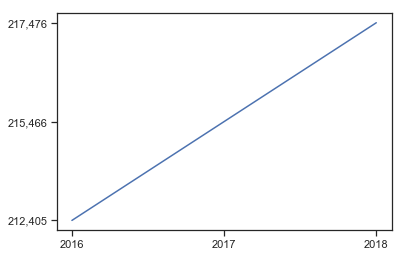

In [76]:
# Plot the line
x_axis = renamed_milk_price_production.index
y_axis = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]

plt.plot(x_axis, y_axis)
plt.show()

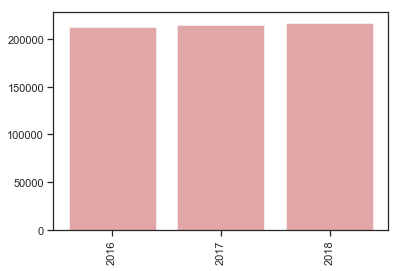

In [77]:
#Chart Milk Production as Bar Chart
#plt.figure(figsize=(20,3))
y_pos_bar = np.arange(len(renamed_milk_price_production))
amount_string = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]
height= [int(i.replace(',', '')) for i in amount_string] 
tick_locations = [value for value in y_pos_bar]
plt.bar(y_pos_bar, height, color='r', alpha=0.5 )
plt.xticks(tick_locations, amount_string.index, rotation="vertical")
plt.show()

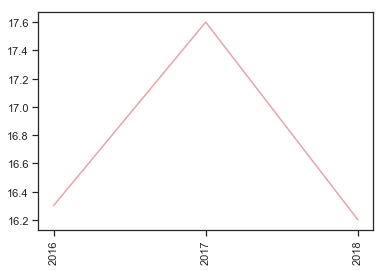

In [78]:
#Chart Milk Price as Line Chart

y_pos_line= np.arange(len(renamed_milk_price_production))
line_height = renamed_milk_price_production["All milk (Dol./cwt)"]
tick_locations = [value for value in y_pos_line]
plt.plot(y_pos_line, line_height, color='r', alpha=0.5 )
plt.xticks(tick_locations, line_height.index, rotation="vertical")
plt.show()

[0.146, 0.157, 0.145]


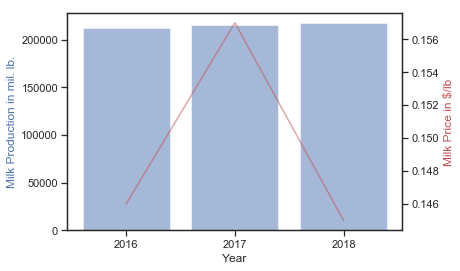

In [79]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots()
amount_string = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]

#If want to convert Million lbs to CWT // divid the mass by 112
#212,405,000,000 / 112 = 1896473214.28571 cwt

height= [int(i.replace(',', '')) for i in amount_string] 
y_pos_bar = amount_string.index
tick_locations = [value for value in y_pos_bar]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production in mil. lb.', color='b')
ax1.set_xlabel('Year')
ax1.tick_params(tick_locations, colors='b')
#If want to convert $/CWT to $/pounds then divid $/cwt by 112 lbs
#16.3 $/cwt = 16.3/112 = 0.145 $/lb

ax2 = ax1.twinx()

y_pos_line= np.arange(len(renamed_milk_price_production))
line_height = renamed_milk_price_production["All milk (Dol./cwt)"]
#print(line_height)

#Convert CWT to pounds // multiply the mass value by 112
line_height_converted = [round((value/112),3) for value in line_height]
print(line_height_converted)

tick_locations = [value for value in y_pos_line]
ax2.plot(y_pos_line, line_height_converted, color='r', alpha=0.5 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")


#fig.tight_layout()
plt.show()


In [80]:
# Import annual data of price and production from 2010 - 2019 as DataFrame
annual_milk_production_price = pd.read_csv("Resources/us_annual_milk_production_price_10-19.csv")
annual_milk_production_price

,Year,Production (billion lb.),Production (lbs.),Price ($/cwt),Price ($/lb.)
0,2010,192.80,192800000000,16.29,0.145
1,2011,196.10,196100000000,20.50,0.183
2,2012,200.30,200300000000,18.50,0.165
3,2013,201.20,201200000000,19.15,0.171
4,2014,206.00,206000000000,23.97,0.214
5,2015,208.60,208600000000,17.13,0.153
6,2016,212.41,212410000000,16.30,0.146
7,2017,215.47,215000000000,17.60,0.157
8,2018,217.48,217480000000,16.20,0.145
9,2019,219.70,219700000000,16.37,0.146


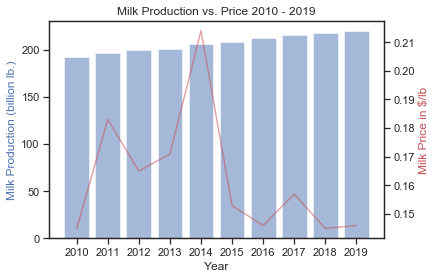

In [81]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots()

#Bar Chart
height= annual_milk_production_price["Production (billion lb.)"] 
y_pos_bar = np.arange(len(annual_milk_production_price))
tick_labels = [value for value in annual_milk_production_price["Year"]]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production (billion lb.)', color='b')
ax1.set_xlabel('Year')
ax1.set_xticks(y_pos_bar)
ax1.set_xticklabels(tick_labels)
ax1.set_title('Milk Production vs. Price 2010 - 2019')

ax2 = ax1.twinx()

y_pos_line= np.arange(len(annual_milk_production_price))
line_height = annual_milk_production_price["Price ($/lb.)"]
ax2.plot(y_pos_line, line_height, color='r', alpha=0.5 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")

# Save Figure
plt.savefig("Outputs/MilkProductionvsPrice.png")

#Show Figure
#fig.tight_layout()
plt.show()





In [82]:
# Import annual data as DataFrame
annual_milk_production_factors = pd.read_csv("Resources/us_annual_milk_production_factors_80-18_fixed.csv")
annual_milk_production_factors.head()

,Year,Milk cows and heifers that have calved (thousand),Milk cows and heifers that have calved,"Replacement heifers, 500+ lbs. (thousand)","Replacement heifers, 500+ lbs.",Replace-ments per 100 cows (thousand),Average number of milk cows in the U.S. (thousand),Average number of milk cows in the U.S.,Milk per cow (lbs.),Milk production (million pounds),...,Average price paid for milk (dollars per cwt),Average price paid for milk ($/lb.),Dairy ration value (dollars per cwt),Dairy ration value ($/ lb),Milk-feed ratio,Milk Cow Price (dollars per head),"Milk Cow Cost, Milk volume required to buy a cow (pounds)",Alfalfa hay price received by farmers (dollars per ton),Slaughter cow price (dollars per cwt),Slaughter cow price ($/lb.)
0,1980,"10,758","10,758,000","4,159",4159000,38.7,10799,10799000,11891,128406,...,13.0,0.130,4.84,0.0484,2.72,1190,9154,72.00,45.73,0.4573
1,1981,"10,849","10,849,000","4,342",4342000,40.0,10898,10898000,12183,132770,...,13.8,0.138,5.04,0.0504,2.76,1200,8696,70.90,41.93,0.4193
2,1982,"10,986","10,986,000","4,547",4547000,41.4,11011,11011000,12306,135505,...,13.6,0.136,4.42,0.0442,3.09,1110,8162,72.73,39.96,0.3996
3,1983,"11,047","11,047,000","4,545",4545000,41.1,11059,11059000,12622,139588,...,13.6,0.136,5.24,0.0524,2.61,1030,7574,78.70,39.35,0.3935
4,1984,"11,059","11,059,000","4,533",4533000,41.0,10793,10793000,12541,135351,...,13.5,0.135,5.34,0.0534,2.54,895,6630,79.48,39.81,0.3981


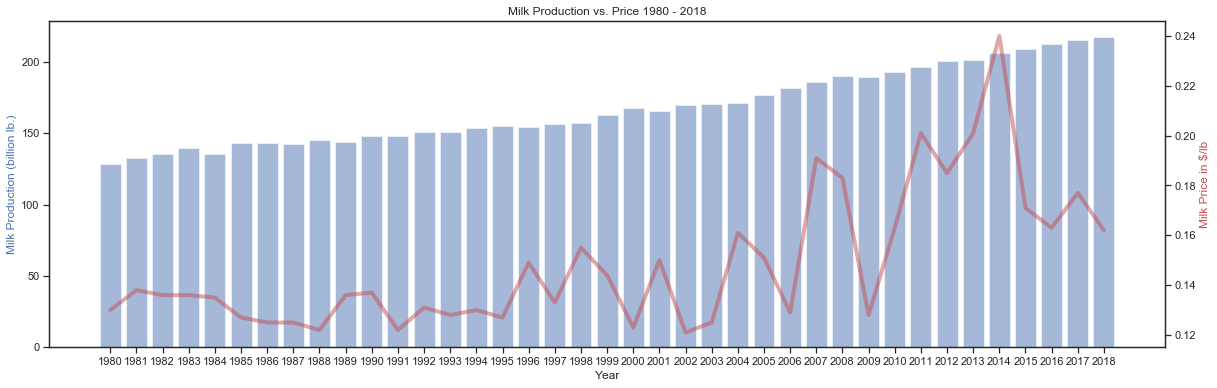

In [83]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots(figsize=(20,6))

#Bar Chart
height= annual_milk_production_factors["Milk production (billion lbs)"] 
y_pos_bar = np.arange(len(annual_milk_production_factors))
tick_labels = [value for value in annual_milk_production_factors["Year"]]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production (billion lb.)', color='b')
ax1.set_xlabel('Year')
ax1.set_xticks(y_pos_bar)
ax1.set_xticklabels(tick_labels)
ax1.set_title('Milk Production vs. Price 1980 - 2018')

ax2 = ax1.twinx()

y_pos_line= np.arange(len(annual_milk_production_factors))
line_height = annual_milk_production_factors["Average price paid for milk ($/lb.)"]
ax2.plot(y_pos_line, line_height, color='r', alpha=0.5, linewidth=4.0 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")


# Save Figure
plt.savefig("Outputs/MilkProductionvsPrice_80-18.png")

#Show Figure
#fig.tight_layout()
plt.show()

In [84]:
annual_milk_production_factors_slim = pd.read_csv("Resources/us_annual_milk_production_factors_slim_fixed.csv")
annual_milk_production_factors_slim

,Year,Average number of milk cows in the U.S. (million),Milk per cow (thousand lbs.),Milk production (billion lbs.),Dairy ration value ($/cwt),Milk Cow Price ($/head),Alfalfa hay price received by farmers ($/ton),Slaughter cow price ($/cwt)
0,1989,10.046,14.323,143.893,5.07,1030,95.98,50.11
1,1998,9.151,17.185,157.262,4.73,1120,94.28,35.54
2,2008,9.314,20.397,189.978,9.17,1950,161.33,51.44
3,2018,9.399,23.149,217.575,7.96,1360,174.58,57.43


[   9.399   23.149  217.575    7.96  1360.     174.58    57.43 ]
[10.046  9.151  9.314  9.399]


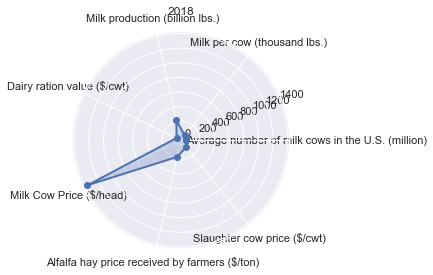

In [85]:
labels=np.array(['Average number of milk cows in the U.S. (million)', 'Milk per cow (thousand lbs.)', 'Milk production (billion lbs.)', 'Dairy ration value ($/cwt)', 'Milk Cow Price ($/head)', 'Alfalfa hay price received by farmers ($/ton)', 'Slaughter cow price ($/cwt)'])
stats=annual_milk_production_factors_slim.loc[3,labels].values
print(stats)
extra = annual_milk_production_factors_slim["Average number of milk cows in the U.S. (million)"].values
print(extra)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

seaborn.set()
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(annual_milk_production_factors_slim.loc[3,"Year"])
ax.grid(True)
plt.show()

In [86]:
reset_annual_milk_production_factors_slim = annual_milk_production_factors_slim.set_index('Year')
reset_annual_milk_production_factors_slim

,Average number of milk cows in the U.S. (million),Milk per cow (thousand lbs.),Milk production (billion lbs.),Dairy ration value ($/cwt),Milk Cow Price ($/head),Alfalfa hay price received by farmers ($/ton),Slaughter cow price ($/cwt)
Year,,,,,,,
1989,10.046,14.323,143.893,5.07,1030,95.98,50.11
1998,9.151,17.185,157.262,4.73,1120,94.28,35.54
2008,9.314,20.397,189.978,9.17,1950,161.33,51.44
2018,9.399,23.149,217.575,7.96,1360,174.58,57.43


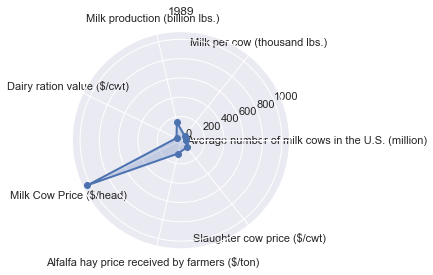

In [87]:
labels=np.array(['Average number of milk cows in the U.S. (million)', 'Milk per cow (thousand lbs.)', 'Milk production (billion lbs.)', 'Dairy ration value ($/cwt)', 'Milk Cow Price ($/head)', 'Alfalfa hay price received by farmers ($/ton)', 'Slaughter cow price ($/cwt)'])
stats=annual_milk_production_factors_slim.loc[0,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

seaborn.set()
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(annual_milk_production_factors_slim.loc[0,"Year"])
ax.grid(True)
plt.show()

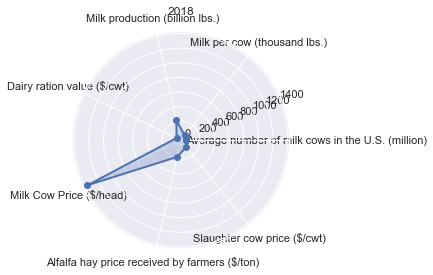

In [88]:
labels=np.array(['Average number of milk cows in the U.S. (million)', 'Milk per cow (thousand lbs.)', 'Milk production (billion lbs.)', 'Dairy ration value ($/cwt)', 'Milk Cow Price ($/head)', 'Alfalfa hay price received by farmers ($/ton)', 'Slaughter cow price ($/cwt)'])
stats=annual_milk_production_factors_slim.loc[3,labels].values
#print(stats)
extra = annual_milk_production_factors_slim["Average number of milk cows in the U.S. (million)"].values
#print(extra)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

seaborn.set()
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(annual_milk_production_factors_slim.loc[3,"Year"])
ax.grid(True)
plt.show()

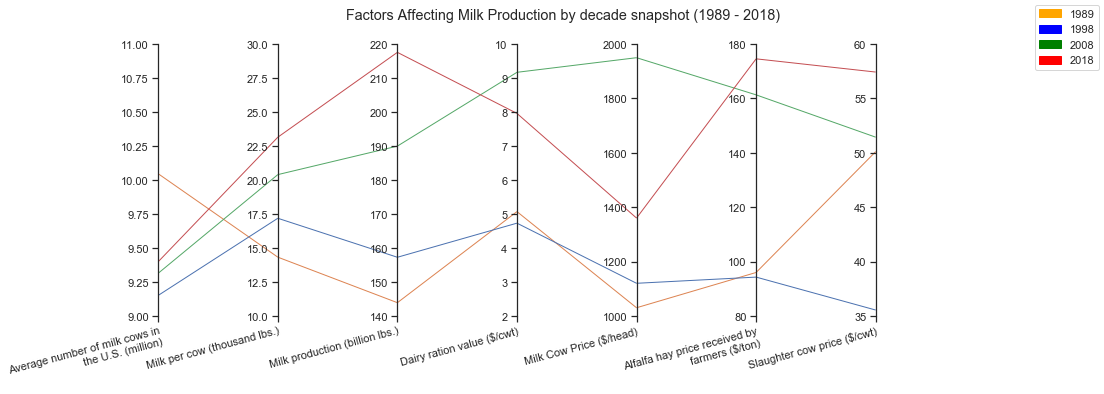

In [89]:
seaborn.set(style='ticks')

def connect_spines(left_ax, right_ax, left_y, right_y, **line_kwds):
    left_trans = mtrans.blended_transform_factory(left_ax.transData, left_ax.transAxes)
    right_trans = mtrans.blended_transform_factory(right_ax.transData, right_ax.transAxes)

    left_data_trans = left_ax.transScale + left_ax.transLimits
    right_data_trans = right_ax.transScale + right_ax.transLimits
    
    left_pos = left_data_trans.transform((0, left_y))[1]
    right_pos = right_data_trans.transform((0, right_y))[1]
    
    bbox = mtrans.Bbox.from_extents(0, left_pos, 0, right_pos)
    right_bbox = mtrans.TransformedBbox(bbox, right_trans)
    left_bbox = mtrans.TransformedBbox(bbox, left_trans)

    connecter = inset.BboxConnector(left_bbox, right_bbox, loc1=3, loc2=2, **line_kwds)
    connecter.set_clip_on(False)
    
    return connecter


data = reset_annual_milk_production_factors_slim.values
columns = [
'Average number of milk cows in the U.S. (million)', 
    'Milk per cow (thousand lbs.)', 
    'Milk production (billion lbs.)', 
    'Dairy ration value ($/cwt)', 
    'Milk Cow Price ($/head)', 
    'Alfalfa hay price received by farmers ($/ton)', 
    'Slaughter cow price ($/cwt)'
]

#seaborn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10})

with seaborn.axes_style('ticks'):
    fig, axes = plt.subplots(ncols=7, figsize=(15,5))
    colors = dict(zip(np.unique(data[:, -1]), seaborn.color_palette(n_colors=4)))
    axes[0].set_ylim(9, 11)
    axes[1].set_ylim(10, 30)
    axes[2].set_ylim(140, 220)
    axes[3].set_ylim(2, 10)
    axes[4].set_ylim(1000, 2000)
    axes[5].set_ylim(80, 180)
    axes[6].set_ylim(35, 60)
    
    
    for n, (ax1, ax2) in enumerate(zip(axes[:-1], axes[1:])):
        lines = []
        
        for row in reset_annual_milk_production_factors_slim.values:
            line = connect_spines(ax1, ax2, row[n], row[n+1], color=colors[row[-1]])
            ax1.add_line(line)
            

    for n, ax in enumerate(axes):
        ax.set_xticks([0])
        mean_length = np.mean([len(i) for i in columns])
        columns2 = ["\n".join(textwrap.wrap(i,mean_length)) for i in columns]
        ax.set_xticklabels([columns2[n]], rotation=15, ha="right",rotation_mode='anchor')
      
    fig.subplots_adjust(wspace=0)
    #fig.legend()
    seaborn.despine(fig=fig, bottom=True, trim=True)
   
    #legend_labels = [value for value in reset_annual_milk_production_factors_slim.index]
    #print(legend_labels)
    #plt.legend([value for value in lines], [value for value in reset_annual_milk_production_factors_slim.index])

orange = mpatches.Patch(color='orange', label='1989')
blue = mpatches.Patch(color='blue', label='1998')
green = mpatches.Patch(color='green', label='2008')
red = mpatches.Patch(color='red', label='2018')
fig.legend(handles=[orange, blue, green, red])
fig.suptitle("Factors Affecting Milk Production by decade snapshot (1989 - 2018)")

# Save Figure
plt.savefig("Outputs/MilkProductionFactors_80-18.png")

#Show Figure
#plt.show

#Resources for Radar Charts
#https://gist.github.com/phobson/9de120cabde660ec734c
#https://stackoverflow.com/questions/33028843/how-to-remove-polar-gridlines-and-add-major-axis-ticks
#https://stackoverflow.com/questions/44670229/how-do-i-display-multiple-radar-charts-with-differently-scaled-axes-each-in-one


In [90]:
utilization_supply_milk = pd.read_csv("Resources/us_supply_and_utilization_80-17_milk_only.csv")
utilization_supply_milk.head()

,Year,Milk Total Supply (million pounds),Milk Total Utilization (million pounds)
0,1980.0,139238.0,126112.0
1,1981.0,148225.0,129673.0
2,1982.0,156534.0,136238.0
3,1983.0,162501.0,139650.0
4,1984.0,160943.0,144159.0
